<a href="https://colab.research.google.com/github/joshuajacobs2020/AirbnbPricePrediction/blob/main/Summary_Statistics%2C_Prices%2C_Residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Clone Github Repo
!git clone https://github.com/joshuajacobs2020/AirbnbPricePrediction
%cd /content/AirbnbPricePrediction

Cloning into 'AirbnbPricePrediction'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 109 (delta 29), reused 23 (delta 5), pack-reused 0
Receiving objects: 100% (109/109), 87.29 MiB | 9.46 MiB/s, done.
Resolving deltas: 100% (29/29), done.
/content/AirbnbPricePrediction


In [ ]:
# Load in Data
df = pd.read_csv("Data/ImprovedAirbnbCleaned.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,days_since_last_review,Entire home/apt,Private room,Shared room,textfeat1,textfeat2,textfeat3,textfeat4,textfeat5,textfeat6
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,262.0,0,1,0,-0.199933,-0.240793,-0.411579,-0.014553,-0.162081,-0.082556
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,48.0,1,0,0,-0.145524,-0.217495,-0.147227,0.064533,-0.054721,-0.018959
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,0,1,0,-0.166395,-0.220829,-0.129764,0.052806,0.111835,0.293807
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,3.0,1,0,0,-0.066644,-0.201145,0.009227,-0.362472,0.598510,-0.507365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,231.0,1,0,0,-0.162961,-0.217565,-0.147368,0.005509,-0.361392,-0.044634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,NaN,0,1,0,-0.490388,0.684779,-0.156719,-0.221970,-0.095484,-0.031168
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,NaN,0,1,0,0.673522,-0.135409,0.004840,-0.366409,-0.244023,0.156192
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,NaN,1,0,0,-0.180383,-0.381988,-0.183885,0.221891,0.175431,-0.031554
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,NaN,0,0,1,-0.126125,-0.206885,-0.144320,0.052223,-0.099838,-0.030075


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'days_since_last_review', 'Entire home/apt',
       'Private room', 'Shared room', 'textfeat1', 'textfeat2', 'textfeat3',
       'textfeat4', 'textfeat5', 'textfeat6'],
      dtype='object')

In [ ]:
# Define X and Y names - using Bronx and Private Room as base case
Xcols = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count', 'Entire home/apt',
        'Shared room', 'textfeat1', 'textfeat2', 'textfeat3',
       'textfeat4', 'textfeat5', 'textfeat6']
ycols = ["price"]

## Making a Map of New York City with Airbnbs by Price

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


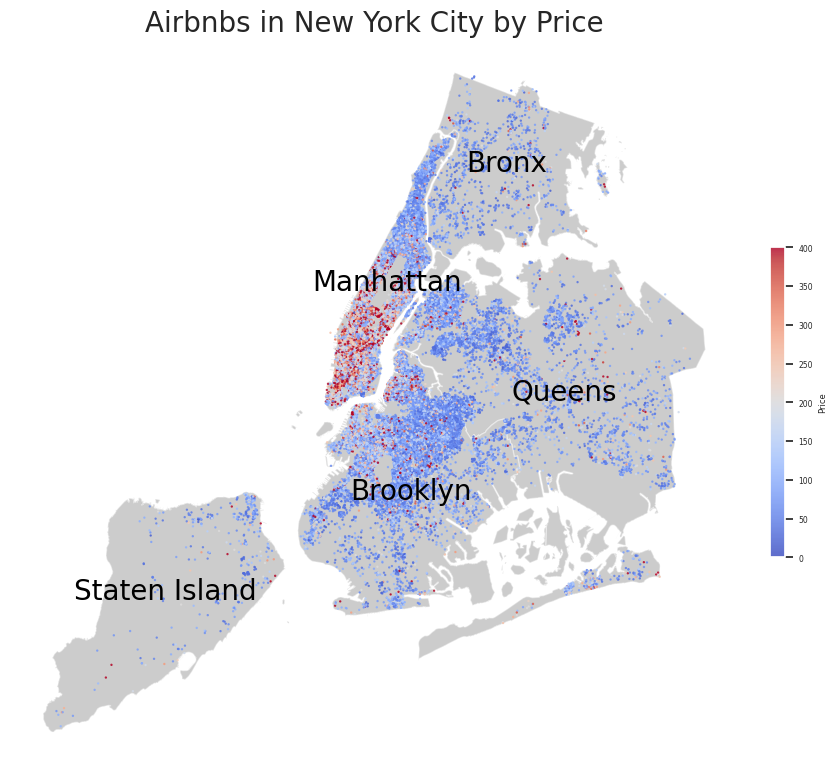

In [ ]:
import geopandas
#!pip install geoplot
import geoplot
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Retrieve map data
cols_to_keep=['store_longitude','store_latitude']
crs={'init':'epsg:4326'}
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geo_df=geopandas.GeoDataFrame(df,crs=crs,
                              geometry=geopandas.points_from_xy(df["longitude"],
                                                                df["latitude"]))


price = df["price"]

# Get the minimum and maximum values of the price column
price_min = df["price"].min()
price_max = df["price"].max()

# Plot the Map and add price points
fig,ax=plt.subplots(figsize=(10,15))
boroughs.plot(ax=ax,alpha=0.4,color="gray")
plt.scatter(x=df["longitude"],y= df["latitude"], c=df["price"], cmap="coolwarm", vmin = price_min, vmax=400, alpha=0.8, s=0.5)
plt.colorbar(label='Price', fraction=0.02, pad=0.04)

# Annotate map with borough names and title
boroughs.apply(lambda x: ax.annotate(color='black',text=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center', size=20), axis=1)
plt.title('Airbnbs in New York City by Price',fontsize=20)

ax.axis("off")
plt.show()

In [ ]:
df["price"].values

array([149, 225, 150, ..., 115,  55,  90])

## Plotting prices
As we see below, price is pretty uniformly distributed from \$0 to \$1200 a night.

[Text(0.5, 0, 'Price'), Text(0, 0.5, 'Frequency')]

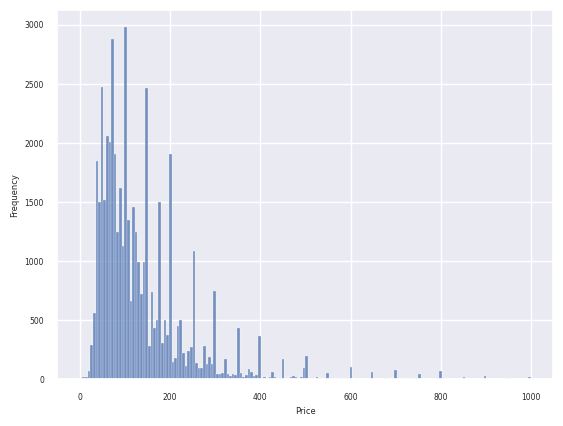

In [ ]:
import seaborn as sns
hist = df.loc[df["price"] < 1000]
ax = sns.histplot(hist, x="price")
#ax.set_style("dark")
ax.set(xlabel='Price', ylabel='Frequency')

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'days_since_last_review', 'Entire home/apt',
       'Private room', 'Shared room', 'textfeat1', 'textfeat2', 'textfeat3',
       'textfeat4', 'textfeat5', 'textfeat6'],
      dtype='object')

In [ ]:
from tabulate import tabulate
price_df = pd.DataFrame(df[['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'number_of_reviews',
        'reviews_per_month', 'days_since_last_review', 'calculated_host_listings_count', 'Entire home/apt',
        'Shared room']].describe())
print(tabulate(price_df, tablefmt = "latex", headers=['','Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'number_of_reviews',
        'reviews_per_month', 'days_since_last_review', 'calculated_host_listings_count', 'Entire home/apt',
        'Shared room'],floatfmt=".2f"))

\begin{tabular}{lrrrrrrrrrr}
\hline
       &   Brooklyn &   Manhattan &   Queens &   Staten Island &   number\_of\_reviews &   reviews\_per\_month &   days\_since\_last\_review &   calculated\_host\_listings\_count &   Entire home/apt &   Shared room \\
\hline
 count &   48895.00 &    48895.00 & 48895.00 &        48895.00 &            48895.00 &            48895.00 &                 38843.00 &                         48895.00 &          48895.00 &      48895.00 \\
 mean  &       0.41 &        0.44 &     0.12 &            0.01 &               23.27 &                1.09 &                   276.93 &                             7.14 &              0.52 &          0.02 \\
 std   &       0.49 &        0.50 &     0.32 &            0.09 &               44.55 &                1.60 &                   413.92 &                            32.95 &              0.50 &          0.15 \\
 min   &       0.00 &        0.00 &     0.00 &            0.00 &                0.00 &                0.00 &       

In [ ]:
from tabulate import tabulate
price_df = pd.DataFrame(df[['Brooklyn', 'Manhattan', 'Queens', 'Staten Island']].describe())
print(tabulate(price_df, tablefmt = "latex", headers=['','Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],floatfmt=".2f"))

\begin{tabular}{lrrrr}
\hline
       &   Brooklyn &   Manhattan &   Queens &   Staten Island \\
\hline
 count &   48895.00 &    48895.00 & 48895.00 &        48895.00 \\
 mean  &       0.41 &        0.44 &     0.12 &            0.01 \\
 std   &       0.49 &        0.50 &     0.32 &            0.09 \\
 min   &       0.00 &        0.00 &     0.00 &            0.00 \\
 25\%   &       0.00 &        0.00 &     0.00 &            0.00 \\
 50\%   &       0.00 &        0.00 &     0.00 &            0.00 \\
 75\%   &       1.00 &        1.00 &     0.00 &            0.00 \\
 max   &       1.00 &        1.00 &     1.00 &            1.00 \\
\hline
\end{tabular}


In [ ]:
cols = ['Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'number of reviews',
        'reviews per month', 'calculated host listings count', "Construction year",
       'house_rules_length', 'cancellation_flexible', 'cancellation_moderate',
       'cancellation_strict', 'instant_bookable_dummy', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room', 'rules_textfeat1', 'rules_textfeat2','names_textfeat1','names_textfeat2','price']

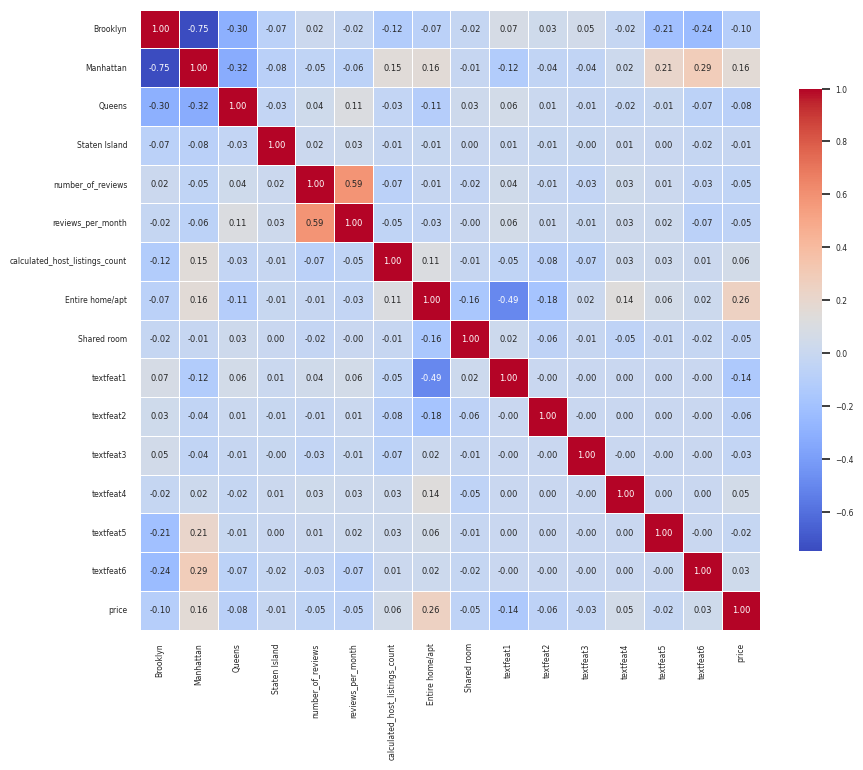

In [ ]:
# Combining data so we can visualize whole dataset

# Creating correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=.5)

# Create a heatmap
corr= df[Xcols+["price"]].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={'shrink': 0.8})
plt.grid(False)
plt.show()

In [ ]:
# split training and testing data
from sklearn.model_selection import train_test_split
X = df[Xcols]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# random forest with max features set from above
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(max_features=5, random_state=1)
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=5, random_state=1)

## Predicting Prices and Getting resids

In [ ]:
df['predicted price'] = rf.predict(df[Xcols])

In [ ]:
df['resid'] = df['price'] - df['predicted price']

In [ ]:
resid_table = df['resid'].describe()
resid_df = pd.DataFrame(resid_table)
print(tabulate(resid_df, tablefmt = "latex", headers=['Residuals'],floatfmt=".2f"))

\begin{tabular}{lr}
\hline
       &   Residuals \\
\hline
 count &    48895.00 \\
 mean  &        0.08 \\
 std   &       22.55 \\
 min   &     -517.23 \\
 25\%   &       -0.45 \\
 50\%   &       -0.02 \\
 75\%   &        0.35 \\
 max   &     3701.42 \\
\hline
\end{tabular}


In [ ]:
np.sqrt(np.mean((df['price'] - df['predicted price'])**2))

22.551318779943372

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


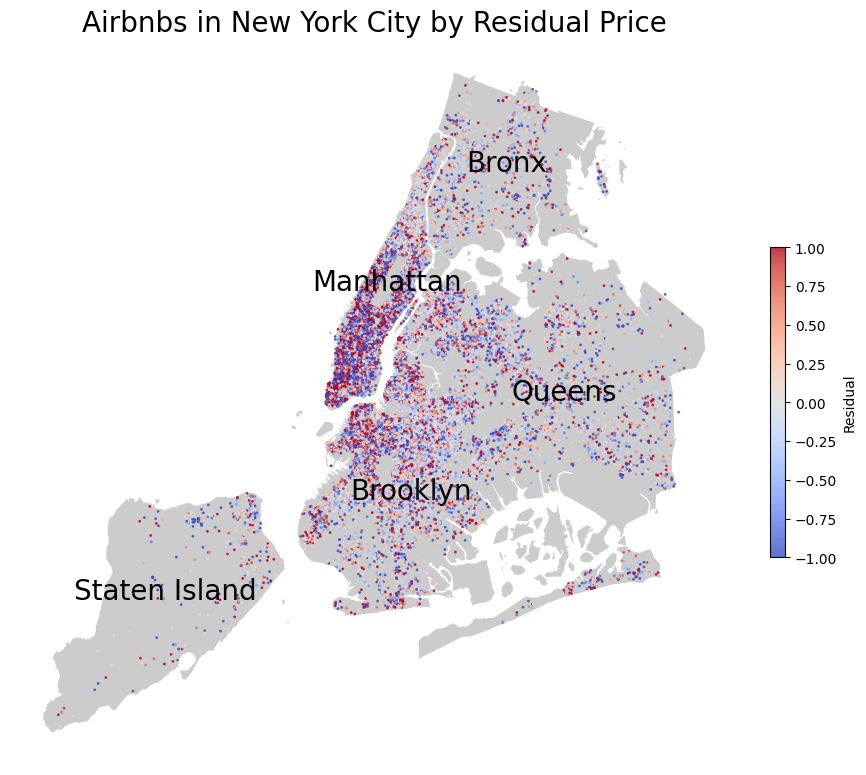

In [ ]:
import geopandas
#!pip install geoplot
import geoplot
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Retrieve map data
cols_to_keep=['store_longitude','store_latitude']
crs={'init':'epsg:4326'}
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geo_df=geopandas.GeoDataFrame(df,crs=crs,
                              geometry=geopandas.points_from_xy(df["longitude"],
                                                                df["latitude"]))


price = df["price"]

# Get the minimum and maximum values of the price column
price_min = df["price"].min()
price_max = df["price"].max()

# Plot the Map and add price points
fig,ax=plt.subplots(figsize=(10,15))
boroughs.plot(ax=ax,alpha=0.4,color="gray")
plt.scatter(x=df["longitude"],y= df["latitude"], c=df["resid"], cmap="coolwarm", vmin = -100, vmax=100, alpha=0.8, s=1)
plt.colorbar(label='Residual', fraction=0.02, pad=0.04)

# Annotate map with borough names and title
boroughs.apply(lambda x: ax.annotate(color='black',text=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center', size=20), axis=1)
plt.title('Airbnbs in New York City by Residual Price',fontsize=20)

ax.axis("off")
plt.show()

In [ ]:
df["resid"].describe()